## Problem Set 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

sys.path.append('../') 
import AdvAppStatFunctions as aas

# setting for plotting
import seaborn as sns
plt.style.use('seaborn-white')
sns.set_style('white', {'legend.frameon':True})
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [570]:
savefig = True

### Exercise 1

In [3]:
data14 = pd.read_html('Data2014.html', header=17)[0]

In [4]:
def select_conf(data, conf, cols):
    df = data[data['Conf'].str.contains(conf, na = False)] 
    
    for c in cols[1:]:
        df[c] = pd.to_numeric(df[c]) # change elements to floats  
        
    #df['Team'] = df['Team'].str.replace('\d+', '') replaces all numbers
    df['Team'] = df['Team'].replace(to_replace='[^A-Za-z]', value='', regex=True) # replaces everything except letters

    return df[cols]

# DataFrame for each conference with team, AdjD and AdjO values for 2014
ACC14_df = select_conf(data14, 'ACC', ['Team', 'AdjD', 'AdjO'])
SEC14_df = select_conf(data14, 'SEC', ['Team', 'AdjD', 'AdjO'])
B1014_df = select_conf(data14, 'B10', ['Team', 'AdjD', 'AdjO'])
BSky14_df = select_conf(data14, 'BSky', ['Team', 'AdjD', 'AdjO'])
A1014_df = select_conf(data14, 'A10', ['Team', 'AdjD', 'AdjO'])

In [5]:
# Color palette 
colorp = sns.color_palette("colorblind", 5, desat=.9)
colorp

[(0.03862745098039211, 0.4409803921568628, 0.6633333333333333),
 (0.8280392156862745, 0.5492156862745097, 0.06215686274509813),
 (0.03843137254901963, 0.5890196078431372, 0.4372549019607843),
 (0.7935294117647059, 0.37352941176470594, 0.041764705882352926),
 (0.7835294117647058, 0.48705882352941177, 0.7270588235294114)]

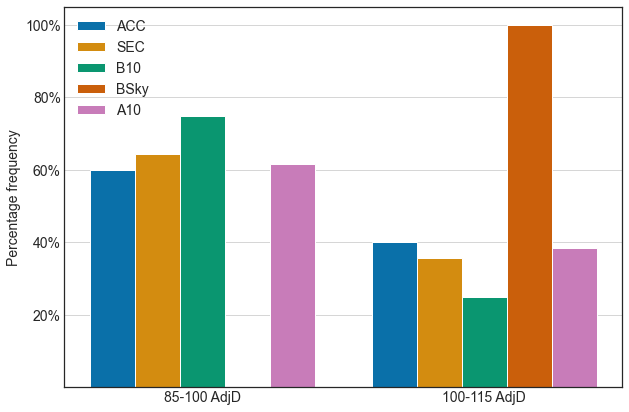

In [575]:
# Histogram

# List with all AdjD values for all five conferences for 2014
AdjDs = [ACC14_df.loc[:,'AdjD'], SEC14_df.loc[:,'AdjD'], B1014_df.loc[:,'AdjD'], 
         BSky14_df.loc[:,'AdjD'], A1014_df.loc[:,'AdjD']]

labels = ['ACC', 'SEC', 'B10', 'BSky','A10']
bins = [100-14.6, 100, 114.6]

plt.figure(figsize=(10,7))
plt.hist(AdjDs, bins = bins, range=[100-14.6, 114.6], label=labels, color=colorp, density=True) 
plt.xticks([(100+(100-14.6))/2, (100+(114.6))/2], ['85-100 AdjD', '100-115 AdjD'])
plt.yticks(np.linspace(0.0, 0.0685, 6), ['','20%', '40%', '60%', '80%', '100%'])
plt.ylabel('Percentage frequency')
plt.grid(axis='y')
plt.legend();

if savefig:
    plt.savefig('Exercise1_histogram')

### Exercise 2

In [7]:
data09 = pd.read_html('Data2009.html', header=17)[0]

In [8]:
# DataFrame for each conference with team, AdjD and AdjO values for 2009
ACC09_df = select_conf(data09, 'ACC', ['Team', 'AdjD', 'AdjO'])
SEC09_df = select_conf(data09, 'SEC', ['Team', 'AdjD', 'AdjO'])
B1009_df = select_conf(data09, 'B10', ['Team', 'AdjD', 'AdjO'])
BSky09_df = select_conf(data09, 'BSky', ['Team', 'AdjD', 'AdjO'])
A1009_df = select_conf(data09, 'A10', ['Team', 'AdjD', 'AdjO'])

In [9]:
# List with all AdjO values for all five conferences for 20014 and 2009

AdjO14s = [ACC14_df.loc[:,'AdjO'], SEC14_df.loc[:,'AdjO'], B1014_df.loc[:,'AdjO'], 
           BSky14_df.loc[:,'AdjO'], A1014_df.loc[:,'AdjO']]

AdjO09s = [ACC09_df.loc[:,'AdjO'], SEC09_df.loc[:,'AdjO'], B1009_df.loc[:,'AdjO'], 
           BSky09_df.loc[:,'AdjO'], A1009_df.loc[:,'AdjO']]

In [10]:
# Function that finds the teams that overlap in the specific conference and calculates the difference in 
# AdjO values. Returns dataframe with differences and the sorted AdjO values for 2009 (for x axis)

def diff(df14, df09):
    df14_sort = pd.DataFrame()
    df09_sort = pd.DataFrame()

    if len(df14['Team']) > len(df09['Team']):
        for i in df14['Team']:
            if df09['Team'].str.contains(i).any():
                df14_sort = df14_sort.append(df14.loc[df14['Team'] == i], ignore_index = True)
                              
    else:
        for i in df09['Team']:
            if df14['Team'].str.contains(i).any():
                df14_sort = df14_sort.append(df14.loc[df14['Team'] == i], ignore_index = True)
                               
            
    df14_sort.drop('AdjD', inplace=True, axis=1)
    df14_sort.rename(columns={"AdjO": "AdjO 14"}, inplace=True)

    for i in df14_sort['Team']:
        df09_sort = df09_sort.append(df09.loc[df09['Team'] == i], ignore_index = True)

    df09_sort.drop('AdjD', inplace=True, axis=1)
    df09_sort.rename(columns={"AdjO": "AdjO 09"}, inplace=True)

    
    df_diff = df14_sort['AdjO 14'].astype(float) - df09_sort['AdjO 09'].astype(float)
    #print(df14_sort['AdjO 14'])
    #print(df09_sort['AdjO 09'])
    
    df09_AdjO = df09_sort['AdjO 09']
    
    return df_diff, df09_AdjO

In [12]:
# Differences in AdjO values for all five conferences

ACC_diff, ACC09_sort = diff(ACC14_df, ACC09_df)
SEC_diff, SEC09_sort = diff(SEC14_df, SEC09_df)
B10_diff, B1009_sort = diff(B1014_df, B1009_df)
BSky_diff, BSky09_sort = diff(BSky14_df, BSky09_df)
A10_diff, A1009_sort = diff(A1014_df, A1009_df)

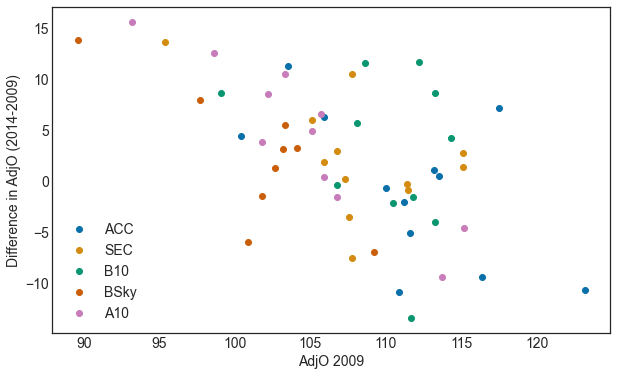

In [574]:
# Differences in AdjO values as a function of the AdjO value in 2009

plt.figure(figsize=(10,6))
plt.plot(ACC09_sort, ACC_diff, 'o', label='ACC', color=colorp[0])
plt.plot(SEC09_sort, SEC_diff, 'o', label='SEC', color=colorp[1])
plt.plot(B1009_sort, B10_diff, 'o', label='B10', color=colorp[2])
plt.plot(BSky09_sort, BSky_diff, 'o', label='BSky', color=colorp[3])
plt.plot(A1009_sort, A10_diff, 'o', label='A10', color=colorp[4])
plt.ylabel('Difference in AdjO (2014-2009)')
plt.xlabel('AdjO 2009')
plt.legend(loc='lower left');

if savefig:
    plt.savefig('Exercise1_scatterplot')

**Median and mean of the difference in AdjO for each of the 5 
conferences**

In [597]:
def med_mean_table(list):
    med_list = []
    mean_list = []
    for i in list:
        med_list.append(np.median(i))
        mean_list.append(np.mean(i))
    return med_list, mean_list

data  = [ACC_diff, SEC_diff, B10_diff, BSky_diff, A10_diff]
med_list, mean_list = med_mean_table(data)

print("\\begin{table*}")
print("\\small")
print("\\centering")
print("\t \\begin{tabular}{ccc}")
print("\t \t \\hline")
print("\t \t \\hline")
print("\t \t {0:8s} & {1:11s} & {2:5s} \\\\".format( "Conference", "Median", "Mean"))
print("\t \t \\hline")

for name, med, mean in zip(labels, med_list, mean_list):
    print(f"\t \t {name:2}  & \t {med:2.2f} & \t {mean:2.2f}  \\\\")
    
print("\t \t \\hline")
print("\t \\end{tabular}")
print("\\end{table*}")

\begin{table*}
\small
\centering
	 \begin{tabular}{ccc}
	 	 \hline
	 	 \hline
	 	 Conference & Median      & Mean  \\
	 	 \hline
	 	 ACC  & 	 -0.05 & 	 -0.63  \\
	 	 SEC  & 	 1.65 & 	 2.28  \\
	 	 B10  & 	 4.30 & 	 2.67  \\
	 	 BSky  & 	 3.20 & 	 2.32  \\
	 	 A10  & 	 4.90 & 	 4.34  \\
	 	 \hline
	 \end{tabular}
\end{table*}


In [14]:
# Function that calculates and prints name, median and mean

def med_mean(name, diff):
    med = np.median(diff)
    mean = np.mean(diff)
    print(name, '\nMedian =', med, '\nMean =', mean, '\n')

# Median and mean for each conference
med_mean('ACC', ACC_diff)
med_mean('SEC', SEC_diff)
med_mean('B10', B10_diff)
med_mean('BSky', BSky_diff)
med_mean('A10', A10_diff)

ACC 
Median = -0.04999999999999716 
Mean = -0.6250000000000036 

SEC 
Median = 1.6499999999999986 
Mean = 2.2833333333333337 

B10 
Median = 4.299999999999997 
Mean = 2.6727272727272746 

BSky 
Median = 3.200000000000003 
Mean = 2.3222222222222246 

A10 
Median = 4.900000000000006 
Mean = 4.336363636363635 



In [ ]:
print("\\begin{table*}")
print("\\small")
print("\\centering")
print("\t \\begin{tabular}{cccccccc}")
print("\t \t \\hline")
print("\t \t \\hline")
print("\t \t {0:8s} & {1:11s} & {2:5s} & {3:5s} & {4:5s} & {5:5s} & {6:5s} & {7:5s} \\\\".format( "GRB", "z", "log $N_{\\text{HI}}$ (cm$^{-2}$)", "log($Z/Z_{\odot}$)", "log $N_{[\\text{OI}^{*}]}$ (cm$^{-2}$)", "log $N_{[\\text{OI}^{**}]}$ (cm$^{-2}$)", "log $\\beta_{\\text{OI-63}}$ ($M_{\odot} / L_{\odt}$)", "log $\\beta_{\\text{OI-145}}$ ($M_{\odot} / L_{\odt}$)"))
print("\t \t \\hline")

for name, z, hi, hi_err, met, met_err, oia, oia_err, oib, oib_err, beta_oia, beta_oia_err, beta_oib, beta_oib_err in zip(names, redshifts, logN_hi, logN_hi_err, log_met, log_met_err, logN_oia, logN_oia_err, logN_oia, logN_oia_err, log_beta_oia, log_beta_oia_err, log_beta_oib, log_beta_oib_err):
    print(f"\t \t {name:2}  & \t {z:2.4f} & \t {hi:2.2f} $\pm$ {hi_err:2.2f} & \t {met:2.2f} $\pm$ {met_err:2.2f} & \t {oia:2.2f} $\pm$ {oia_err:2.2f} & \t {oib:2.2f} $\pm$ {oib_err:2.2f} & \t {beta_oia:2.2f}  $\pm$ {beta_oia_err:2.2f}  & {beta_oib:2.2f} $\pm$ {beta_oib_err:2.2f}   \\\\")
    
print("\t \t \\hline")
print("\t \\end{tabular}")
print("\\end{table*}")

**Median and mean of the difference in AdjO for all teams that were 
not in the 5 conferences**

In [494]:
# List with conference names to be removed and 'Conf' which is a header in the original data
confs = ['ACC', 'SEC', 'B10', 'BSky', 'A10', 'Conf'] 
confs = ('|'.join(confs)) # makes list to one str with vertical bar as delimiter

# Remove the five conferences that we dont wish to include
data14_sel = data14[data14['Conf'].str.contains(confs, na=False) == False] 
data14_sel['Team'] = data14_sel['Team'].replace(to_replace='[^A-Za-z]', value='', regex=True)
data14_sel = data14_sel.dropna(axis=0).copy()

data09_sel = data09[data09['Conf'].str.contains(confs, na=False) == False]
data09_sel['Team'] = data09_sel['Team'].replace(to_replace='[^A-Za-z]', value='', regex=True)
data09_sel = data09_sel.dropna(axis=0).copy()

# Determining the difference in AdjO values the remaning conferences 
rest_diff, rest09 = diff(data14_sel, data09_sel)

# Calculating the median and mean for the remaining conferences
med_mean('All but the five conferences', rest_diff)

All but the five conferences 
Median = 1.8999999999999915 
Mean = 2.5952727272727274 



### Exercise 3

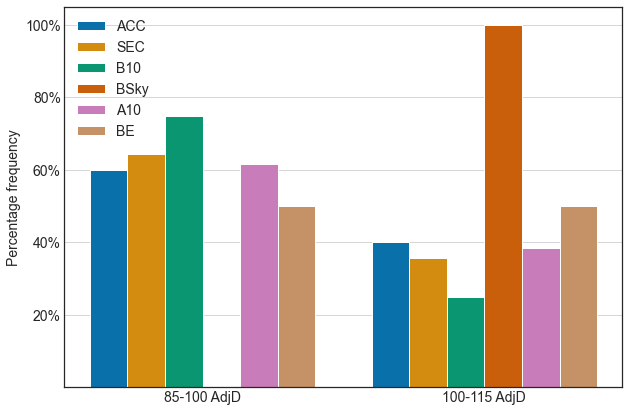

In [580]:
# Adding BE conference
BE14_df = select_conf(data14, 'BE', ['Team', 'AdjD', 'AdjO'])
BE09_df = select_conf(data09, 'BE', ['Team', 'AdjD', 'AdjO'])

# List with all AdjD values for all five conferences for 2014
AdjDs6 = [ACC14_df.loc[:,'AdjD'], SEC14_df.loc[:,'AdjD'], B1014_df.loc[:,'AdjD'], 
         BSky14_df.loc[:,'AdjD'], A1014_df.loc[:,'AdjD'], BE14_df.loc[:,'AdjD']]

colorp6 = sns.color_palette("colorblind", 6, desat=.9)
labels = ['ACC', 'SEC', 'B10', 'BSky','A10', 'BE']
bins = [100-14.6, 100, 114.6]

plt.figure(figsize=(10,7))
plt.hist(AdjDs6, bins = bins, range=[100-14.6, 114.6], label=labels, color=colorp6, density=True) #, histtype='barstacked')
plt.xticks([(100+(100-14.6))/2, (100+(114.6))/2], ['85-100 AdjD', '100-115 AdjD'])
plt.yticks(np.linspace(0.0, 0.0685, 6), ['','20%', '40%', '60%', '80%', '100%'])
plt.ylabel('Percentage frequency')
plt.grid(axis='y')
plt.legend(loc='upper left');

if savefig:
    plt.savefig('Exercise3_histogram')

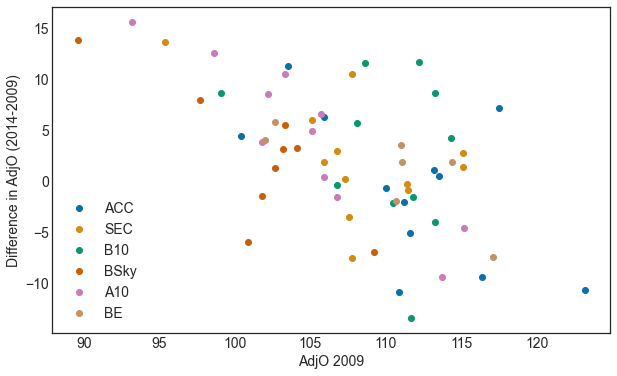

In [579]:
# Differences in AdjO values for BE conference

BE_diff, BE09_sort = diff(BE14_df, BE09_df)

plt.figure(figsize=(10,6))
plt.plot(ACC09_sort, ACC_diff, 'o', label='ACC', color=colorp6[0])
plt.plot(SEC09_sort, SEC_diff, 'o', label='SEC', color=colorp6[1])
plt.plot(B1009_sort, B10_diff, 'o', label='B10', color=colorp6[2])
plt.plot(BSky09_sort, BSky_diff, 'o', label='BSky', color=colorp6[3])
plt.plot(A1009_sort, A10_diff, 'o', label='A10', color=colorp6[4])
plt.plot(BE09_sort, BE_diff, 'o', label='BE', color=colorp6[5])
plt.ylabel('Difference in AdjO (2014-2009)')
plt.xlabel('AdjO 2009')
plt.legend(loc='lower left');

if savefig:
    plt.savefig('Exercise3_scatterplot')

In [18]:
med_mean('BE', BE_diff)

BE 
Median = 1.9000000000000057 
Mean = 1.1428571428571408 



In [562]:
# Function that finds the teams that overlap in the specific conference and calculates the difference in 
# AdjO values. Returns dataframe with differences and the sorted AdjO values for 2009 (for x axis)

def diff2(df14, df09):
    df14_sort = pd.DataFrame()
    df09_sort = pd.DataFrame()
    


    if len(df14['Team']) > len(df09['Team']):
        for i in df14['Team']:
            if df09['Team'].str.contains(i).any():
                df14_sort = df14_sort.append(df14.loc[df14['Team'] == i], ignore_index = True)
    
        for i in df14_sort['Team']:
            df09_sort = df09_sort.append(df09.loc[df09['Team'] == i], ignore_index = True)

    df_diff = df14_sort['AdjO'].astype(float) - df09_sort['AdjO'].astype(float)

    df14_AdjO = df14_sort
    df09_AdjO = df09_sort
    
    return df_diff, df14_sort['Team'], df09_sort['Team']

In [563]:
# SAME as before but now excluding BE as well

# List with conference names to be removed and 'Conf' which is a header in the original data
confs = ['ACC', 'SEC', 'B10', 'BSky', 'A10', 'BE', 'Conf'] 
confs = ('|'.join(confs)) # makes list to one str with vertical bar as delimiter

# Remove the five conferences that we dont wish to include
data14_sel = data14[data14['Conf'].str.contains(confs, na=False) == False] 
data14_sel['Team'] = data14_sel['Team'].replace(to_replace='[^A-Za-z]', value='', regex=True)
data14_sel = data14_sel.dropna(axis=0).copy()

data09_sel = data09[data09['Conf'].str.contains(confs, na=False) == False]
data09_sel['Team'] = data09_sel['Team'].replace(to_replace='[^A-Za-z]', value='', regex=True)
data09_sel = data09_sel.dropna(axis=0).copy()

# Determining the difference in AdjO values the remaning conferences 
rest_diff, df14_AdjO, df09_AdjO = diff2(data14_sel, data09_sel)

# Calculating the median and mean for the remaining conferences
med_mean('All but the six conferences', rest_diff)

All but the six conferences 
Median = nan 
Mean = 2.722307692307693 



In [555]:
if data09_sel['Team'].str.contains('Connecticut').any():
    print('d')

d


In [566]:
if 'Memphis' in data09_sel['Team']:
    print('h')

In [581]:
#for i in range(len(df14_AdjO)):
#    print(df14_AdjO[i], df09_AdjO[i])

med 1.85 og mean 2.624

### Exercise 4

In [42]:
!pip install PyPDF2

     |████████████████████████████████| 232 kB 4.3 MB/s eta 0:00:01


In [663]:
from PyPDF2 import PdfReader
import re

In [664]:
data = PdfReader('authors-acknowledgements-v5.pdf')

text = ""
count = 0
for page in data.pages:
    count += 1
    text += page.extract_text() + "\n"
    if count == 11:
        break
        
# Splits long string into list of strings
authors = text.split('\n')
authors = [i.split(',') for i in authors]

In [665]:
# Append all elements into list 
authors_ = []

for i in authors:
    for j in i:
        authors_.append(j)

In [666]:
# names with no dot in them
names = ['ABHIRUPGHOSH','ARCHISMANGHOSH','CHUNGLEEKIM', 'ARUNAVAMUKHERJEE', 'HOWARDPAN', 'HUANG-WEIPAN', 'HANGYU', 
         'HAOCUNYU','CARLOMIGONI', 'SABRINAMILIA', 'ALESSANDRONAVARRINI', 'BOBJACOBS', 'HMIYASAKA', 'ABEARDSLEY']  

In [667]:
# Function that removes all the stuff that needs to be removed

def remove(list):
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list]
    
    pattern = ' AND '
    list = [re.sub(pattern, '', i) for i in list]
    
    pattern = ' '
    list = [re.sub(pattern, '', i) for i in list]
    
    pattern = '\n'
    list = [re.sub(pattern, '', i) for i in list]
    
    pattern = '\x03'
    list = [re.sub(pattern, '', i) for i in list]
    
    pattern = 'JR.'
    list = [re.sub(pattern, 'JR', i) for i in list]
    
    while('' in list):
        list.remove('')
        
    for i in list:
        if i.startswith('('):
            list.remove(i)
            
    for i in list:
        if i.endswith(')'):
            list.remove(i)
            
    for i in list:
        if '.' not in i and i not in names:
            list.remove(i)
        
    for i in range(len(list)):
        if list[i].startswith('AND'):
            list[i] = re.sub('AND', '', list[i])
        
    list = list[2:-44]
    list.pop(2448)
    
    return list

**How many unique authors are there in that list?**

In [668]:
authors_sort = remove(authors_)

In [669]:
print('Number of authors', len(authors_sort))

Number of authors 3612


In [670]:
print('Number of unique authors', len(np.unique(authors_sort)))

Number of unique authors 3514


In [645]:
# Loop that prints the duplicates
all_ = []
duplicates = []
tri = []
for i in authors_sort:
    if i in all_:
        duplicates.append(i)
        if i in tri:
            print(i)
    all_.append(i)

In [608]:
print(duplicates)

['S.SARKAR', 'Y.CHEN', 'L.SUN', 'T.ZHANG', 'Y.ZHANG', 'I.DIPALMA', 'S.D.BARTHELMY', 'F.PAOLETTI', 'M.R.DROUT', 'Y.ZHANG', 'S.YANG', 'L.A.ANTONELLI', 'A.PELLIZZONI', 'A.POSSENTI', 'G.BARBIELLINI', 'E.BISSALDI', 'L.R.COMINSKY', 'A.FRANCKOWIAK', 'F.LONGO', 'A.MORSELLI', 'M.RAZZANO', 'C.W.JAMES', 'K.ACKLEY', 'X.LI', 'M.TANAKA', 'J.BARNES', 'S.BARWAY', 'D.CHATTERJEE', 'C.COPPERWHEAT', 'S.W.K.EMERY', 'P.A.EVANS', 'S.GHOSH', 'R.ITOH', 'D.KASEN', 'N.P.M.KUIN', 'P.A.MAZZALI', 'P.NUGENT', 'T.PIRAN', 'H.QI', 'S.ROSSWOG', 'E.M.SADLER', 'Y.XU', 'D.M.COWARD', 'I.ANDREONI', 'A.KLOTZ', 'B.GENDRE', 'P.THIERRY', 'D.TURPIN', 'J.KIM', 'C.FROHMAIER', 'M.SMITH', 'J.SOLLERMAN', 'T.KR¨UHLER', 'J.GREINER', 'S.KLOSE', 'J.MAO', 'M.C.D´IAZ', 'D.L.DEPOY', 'J.L.MARSHALL', 'A.ZADRO˙ZNY', 'M.WALKER', 'K.YAMAOKA', 'J.BECKERTJUS', 'J.BREGEON', 'T.BULIK', 'S.COLAFRANCESCO', 'S.FUNK', 'M.-H.GRONDIN', 'M.LEMOINE-GOUMARD', 'M.MEYER', 'P.O’BRIEN', 'A.REIMER', 'O.REIMER', 'L.TIBALDO', 'B.VANSOELEN', 'A.ROWLINSON', 'R.A.M.J.W

In [ ]:
186, 233 og 195

In [ ]:
diff_person = ['S.SARKAR', 'Y.CHEN', 'M.LEMOINE-GOUMARD']

In [ ]:
same_person = ['J.SOLLERMAN']

**If there was one single author list in alphabetical order (instead of 
being grouped by experimental collaboration), what author is the mid-
point.** 

In [610]:
# A list with unique authors
authors_unique = (np.unique(authors_sort)).tolist()

In [611]:
# Names that need to be modified
names_modified = ['ABHIRUP. GHOSH','ARCHISMAN. GHOSH','CHUNGLEE. KIM', 'ARUNAVA. MUKHERJEE', 'HOWARD. PAN', 
                   'HUANG-WEI. PAN', 'HANG. YU', 'HAOCUN. YU','CARLO. MIGONI', 'SABRINA. MILIA', 
                  'ALESSANDRO. NAVARRINI', 'BOB. JACOBS', 'H. MIYASAKA', 'A. BEARDSLEY']  

In [636]:
# Modified into
names_modified2 = ['A.GHOSH','A.GHOSH','C.KIM', 'A.MUKHERJEE', 'H.PAN', 
                   'H.W.PAN', 'H.YU', 'H.YU','C.MIGONI', 'S.MILIA', 
                  'A.NAVARRINI', 'B.JACOBS', 'H.MIYASAKA', 'A.BEARDSLEY']  

In [637]:
# Modification of some of the names

for i in authors_unique:
    if i in names_modified:
        index_authors = authors_unique.index(i)
        index_names = names_modified.index(i)
        authors_unique[index_authors] = names_modified2[index_names]

In [677]:
# Function that sort the names by last name, then by first name, and then by their middle names

def sort_names(names):
    def extract_names(name):
        parts = name.split('.')
        last_name = parts[-1]
        
        if len(parts) == 4:
            first_name = parts[0]
            middle_name1 = parts[1]
            middle_name2 = parts[2]
        
        elif len(parts) == 3:
            first_name = parts[0]
            middle_name1 = parts[1]
            middle_name2 = ''

        else:
            first_name = parts[0]
            middle_name1 = ''
            middle_name2 = ''
                    
        return (last_name, first_name, middle_name1, middle_name2)
    return sorted(names, key=extract_names)

In [681]:
test = ['A. Wilson', 'A. A. Wilson', 'B. A. Wilson', 'A. Williams', 'A. B. A. Wilson']
sort_names(test)

['A. Williams', 'A. Wilson', 'A. A. Wilson', 'A. B. A. Wilson', 'B. A. Wilson']

In [640]:
# Unique authors sorted by name
authors_unique_alpha = sort_names(authors_unique)

In [682]:
N_unique = len(authors_unique_alpha)
print('Median names:', authors_unique_alpha[int(N_unique/2-1)], authors_unique_alpha[int(N_unique/2)])

Median names: T.P.LI T.S.LI


In [683]:
authors_sort_alpha = sort_names(authors_sort)
N_author = len(authors_sort_alpha)
print('Median names:', authors_sort_alpha[int(N_author/2-1)], authors_sort_alpha[int(N_author/2)])

Median names: G.LI M.S.LI
